# GABUNGAN COBA TABEL KAYAK SUMBER

In [69]:
#GABUNGAN!

#ngambil numpy
import numpy as np
#aku butuh pandas buat bikin tabel
from numpy import linspace, array, zeros, insert, delete
from pandas import DataFrame, pivot_table

def f(x):
    return(2*x-8)

K=1 #Koefisien panas
xm=10 #panjang pipa/tali/senar
A=-8 #suhu di x0
B=48 #suhu di xm
deltat=0.3 #selisih waktu
tn=100 #tadinya sih untuk maks waktu. tapi gatau nih?
m=10 #banyak pemotongan
deltax=xm/m #selisih antar posisi
lamda=(K*deltat)/(deltax)**2 #lamda

#print(deltat)
#print(deltax)
#print(lamda)

#definisi array
#definisi matriks U
t=[]
ux0=[]
ux1=[]
ux2=[]
ux3=[]
ux4=[]
ux5=[]
U=zeros((tn+2,m+1))

print('U = ')
print(U)

#ngisi kolom 1 sama kolom 2
#kolom 1 menyatakan posisi
#kolom 2 menyatakan syarat awal
for i in range (m+1):
    
    U[0][i]=i
    U[1][i]=f(i)

#menyatakan syarat batas ujung kiri dan kanan
for k in range (tn):
    for i in range (m-1):
        
        kk=k+1
        ii=i+2
        U[kk+1][0]=A
    
    U[kk+1][ii]=B

#ngisi yang perlu diisi
for k in range (tn):
    
    kk=k+1
    
    for i in range (m-1):
                
        ii=i+1
        U[kk+1][ii]=lamda*U[kk][ii-1]+(1-2*lamda)*U[kk][ii]+lamda*U[kk][ii+1]

#output bagus, kayak di sumber, tapi nggak rapi karena masih matriks
print('U baru = ')
print(U)

#buang baris pertama
V=delete(U, (0), axis=0)
print('V baru = ')
print(V)

#ambil per baris?
for i in range (tn+1):
    print('V[',i,'] = ',V[i])

#oper ke tabel (biar rapi)
#PERBAIKI!!!
for k in range (4):
    t.append((k)*deltat)
    ux0.append(U[k+1][0])
    ux1.append(U[k+1][1])
    ux2.append(U[k+1][2])
    ux3.append(U[k+1][3])
    ux4.append(U[k+1][4])
    ux5.append(U[k+1][5])

data={'t \ x':t, 0*deltax:ux0, 1*deltax:ux1, 2*deltax:ux2, 3*deltax:ux3, 4*deltax:ux4, 5*deltax:ux5}
DataFrame(data)

U = 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
U baru = 
[[ 0.          1.          2.         ...  8.          9.
  10.        ]
 [-8.         -6.         -4.         ...  8.         10.
  12.        ]
 [-8.         -6.         -4.         ...  8.         10.
  48.        ]
 ...
 [-8.         -2.78985022  2.45844701 ... 36.05828969 42.01005255
  48.        ]
 [-8.         -2.77840598  2.48021682 ... 36.08007753 42.02150793
  48.        ]
 [-8.         -2.76729735  2.5013481  ... 36.10122477 42.03262643
  48.        ]]
V baru = 
[[-8.         -6.         -4.         ...  8.         10.
  12.        ]
 [-8.         -6.         -4.         ...  8.         10.
  48.        ]
 [-8.         -6.         -4.         ...  8.         20.8
  48.        ]
 ...
 [-8.         -2.78985022  2.45844701 ... 36.05828969 42.01005255
  48.        ]
 [-8.         -2.77840598  2.48021682 ... 36.

,t \ x,0.0,1.0,2.0,3.0,4.0,5.0
0,0.0,-8.0,-6.0,-4.0,-2.0,0.0,2.0
1,0.3,-8.0,-6.0,-4.0,-2.0,0.0,2.0
2,0.6,-8.0,-6.0,-4.0,-2.0,0.0,2.0
3,0.9,-8.0,-6.0,-4.0,-2.0,0.0,2.0


In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

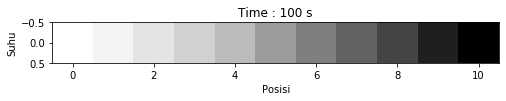

In [71]:
fig = plt.figure(figsize=(8,2))
ax = plt.subplot()

ax.set_title('HEATMAP MDLDS')
ax.set_xlabel('Posisi')
ax.set_ylabel('Suhu')

nx = 1
ny = m+1

line2d, = ax.plot([], [], lw=2)

def init():
    line2d.set_data([], [])
    ax.imshow(np.zeros((nx, ny)))
    return (line2d,)

def animate(i):
    ax.set_title('Time : '+str(i)+' s')    
    #ax.imshow([V[i]], cmap='YlOrRd')
    ax.imshow([V[i]], cmap='Greys')
    return (line2d,)

anim = animation.FuncAnimation(fig, animate, frames=tn+1, interval=100, blit=True)

HTML(anim.to_html5_video())

## SIMULASI

In [66]:
#GABUNGAN!

#ngambil numpy
import numpy as np
#aku butuh pandas buat bikin tabel
from numpy import linspace, array, zeros, insert, delete
from pandas import DataFrame, pivot_table

def f(x):
    return(2*x-8)

K=1 #Koefisien panas
xm=10 #panjang pipa/tali/senar
A=-8 #suhu di x0
B=48 #suhu di xm
deltat=0.3 #selisih waktu
tn=100 #tadinya sih untuk maks waktu. tapi gatau nih?
m=10 #banyak pemotongan
deltax=xm/m #selisih antar posisi
lamda=(K*deltat)/(deltax)**2 #lamda

#print(deltat)
#print(deltax)
#print(lamda)

#definisi array
#definisi matriks U
t=[]
ux0=[]
ux1=[]
ux2=[]
ux3=[]
ux4=[]
ux5=[]
U=zeros((tn+2,m+1))

print('U = ')
print(U)

#ngisi kolom 1 sama kolom 2
#kolom 1 menyatakan posisi
#kolom 2 menyatakan syarat awal
for i in range (m+1):
    
    U[0][i]=i
    U[1][i]=f(i)

#menyatakan syarat batas ujung kiri dan kanan
for k in range (tn):
    for i in range (m-1):
        
        kk=k+1
        ii=i+2
        U[kk+1][0]=A
    
    U[kk+1][ii]=B

#ngisi yang perlu diisi
for k in range (tn):
    
    kk=k+1
    
    for i in range (m-1):
                
        ii=i+1
        U[kk+1][ii]=lamda*U[kk][ii-1]+(1-2*lamda)*U[kk][ii]+lamda*U[kk][ii+1]

#output bagus, kayak di sumber, tapi nggak rapi karena masih matriks
print('U baru = ')
print(U)

#buang baris pertama
V=delete(U, (0), axis=0)
print('V baru = ')
print(V)

#ambil per baris?
for i in range (tn+1):
    print('V[',i,'] = ',V[i])

#oper ke tabel (biar rapi)
#PERBAIKI!!!
for k in range (4):
    t.append((k)*deltat)
    ux0.append(U[k+1][0])
    ux1.append(U[k+1][1])
    ux2.append(U[k+1][2])
    ux3.append(U[k+1][3])
    ux4.append(U[k+1][4])
    ux5.append(U[k+1][5])

data={'t \ x':t, 0*deltax:ux0, 1*deltax:ux1, 2*deltax:ux2, 3*deltax:ux3, 4*deltax:ux4, 5*deltax:ux5}
DataFrame(data)

U = 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
U baru = 
[[ 0.          1.          2.         ...  8.          9.
  10.        ]
 [-8.         -6.         -4.         ...  8.         10.
  12.        ]
 [-8.         -6.         -4.         ...  8.         10.
  48.        ]
 ...
 [-8.         -2.78985022  2.45844701 ... 36.05828969 42.01005255
  48.        ]
 [-8.         -2.77840598  2.48021682 ... 36.08007753 42.02150793
  48.        ]
 [-8.         -2.76729735  2.5013481  ... 36.10122477 42.03262643
  48.        ]]
V baru = 
[[-8.         -6.         -4.         ...  8.         10.
  12.        ]
 [-8.         -6.         -4.         ...  8.         10.
  48.        ]
 [-8.         -6.         -4.         ...  8.         20.8
  48.        ]
 ...
 [-8.         -2.78985022  2.45844701 ... 36.05828969 42.01005255
  48.        ]
 [-8.         -2.77840598  2.48021682 ... 36.

,t \ x,0.0,1.0,2.0,3.0,4.0,5.0
0,0.0,-8.0,-6.0,-4.0,-2.0,0.0,2.0
1,0.3,-8.0,-6.0,-4.0,-2.0,0.0,2.0
2,0.6,-8.0,-6.0,-4.0,-2.0,0.0,2.0
3,0.9,-8.0,-6.0,-4.0,-2.0,0.0,2.0


In [67]:
#import pandas as pd
#import seaborn as sns
#import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

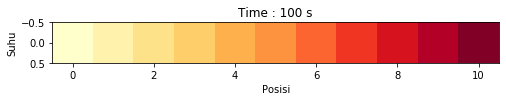

In [68]:
fig = plt.figure(figsize=(8,2))
ax = plt.subplot()

ax.set_title('HEATMAP MDLDS')
ax.set_xlabel('Posisi')
ax.set_ylabel('Suhu')

nx = 1
ny = 6

line2d, = ax.plot([], [], lw=2)

def init():
    line2d.set_data([], [])
    ax.imshow(np.zeros((nx, ny)))
    return (line2d,)

def animate(i):
    ax.set_title('Time : '+str(i)+' s')    
    ax.imshow([V[i]], cmap='YlOrRd')
    return (line2d,)

anim = animation.FuncAnimation(fig, animate, frames=tn+1, interval=100, blit=True)

HTML(anim.to_html5_video())

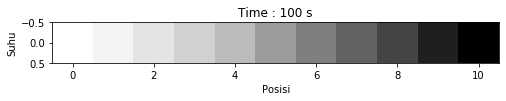

In [72]:
fig = plt.figure(figsize=(8,2))
ax = plt.subplot()

ax.set_title('HEATMAP MDLDS')
ax.set_xlabel('Posisi')
ax.set_ylabel('Suhu')

nx = 1
ny = m+1

line2d, = ax.plot([], [], lw=2)

def init():
    line2d.set_data([], [])
    ax.imshow(np.zeros((nx, ny)))
    return (line2d,)

def animate(i):
    ax.set_title('Time : '+str(i)+' s')    
    #ax.imshow([V[i]], cmap='YlOrRd')
    ax.imshow([V[i]], cmap='Greys')
    return (line2d,)

anim = animation.FuncAnimation(fig, animate, frames=tn+1, interval=100, blit=True)

HTML(anim.to_html5_video())